In [119]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

STEP 1: Load dataset

In [100]:
df = pd.read_csv('/content/drive/MyDrive/deep learning projects/youtube_2025_dataset_202504061614.csv')

Step 2: Data Preprocessing

In [101]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

In [102]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [103]:
df = pd.get_dummies(df, columns=['Neural Interface Compatible', 'Metaverse Integration Level'], drop_first=True)

In [104]:
X = df.drop('Total Subscribers', axis=1)
y = df['Total Subscribers']

In [105]:
print(X.dtypes)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1, how='any')

Channel Name                          object
Youtuber Name                         object
Total Videos                           int64
Best Video                            object
Avg Video Length (min)               float64
Members Count                          int64
AI Generated Content (%)               int64
Quantum Computing Topics               int64
Holographic Content Rating            object
Engagement Score                     float64
Content Value Index                  float64
Neural Interface Compatible_True        bool
Metaverse Integration Level_Basic       bool
Metaverse Integration Level_Full        bool
dtype: object


In [106]:
numeric_cols = X.select_dtypes(include=[np.number]).columns

Step 3: Train-Test Split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 4: Feature Scaling

In [108]:
scaler = StandardScaler()
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

In [109]:
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

Step 5: Build the Neural Network

In [110]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.compile(optimizer='adam', loss='mean_squared_error')

Step 6: Train the Model

In [112]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 21821751558144.0000 - val_loss: 76133580800.0000
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35339628544.0000 - val_loss: 6066098688.0000
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4550058496.0000 - val_loss: 2022412672.0000
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1599551360.0000 - val_loss: 870134272.0000
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 663734272.0000 - val_loss: 410647328.0000
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 282256928.0000 - val_loss: 206876800.0000
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 204262464.0000 - val_loss: 134405072.0000
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103606560.0000 - val_loss: 80023960.0000
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68475448.0000 - val_loss: 57202488.0000
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 48732568.00

Step 7: Predictions

In [113]:
y_pred = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Step 8: Evaluate Model

In [114]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 422.53533935546875
R2 Score: 0.9999999403953552


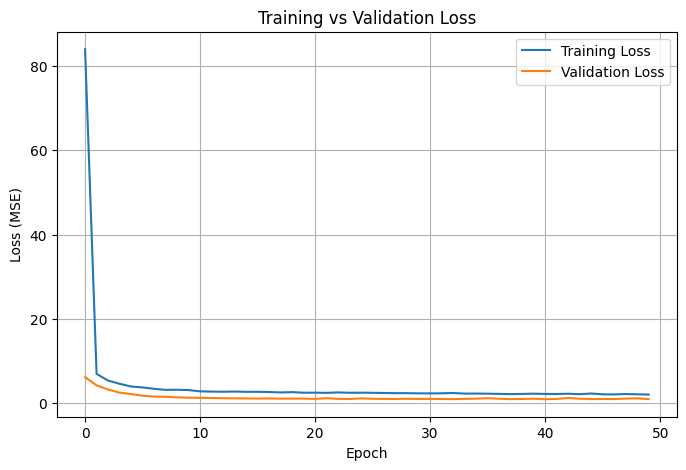

In [116]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


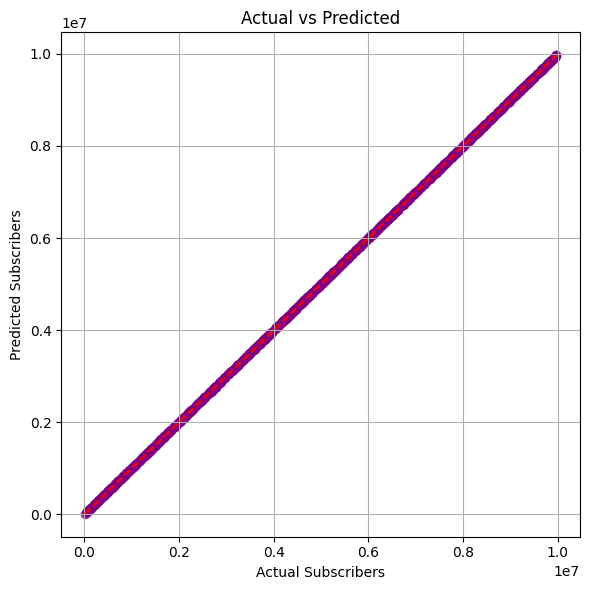

In [117]:
# Predict on test set
y_pred = model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Subscribers')
plt.ylabel('Predicted Subscribers')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

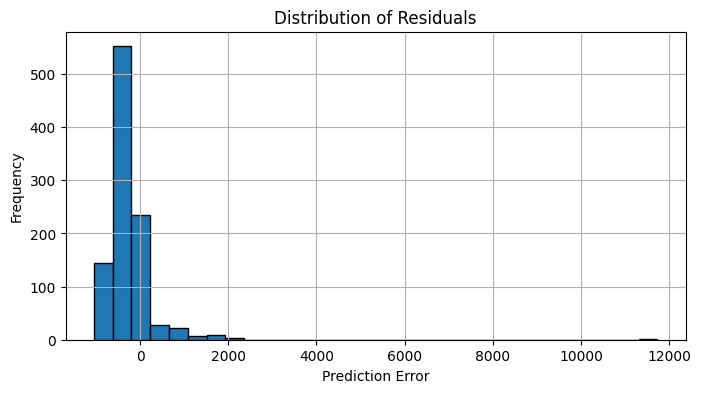

In [118]:
residuals = y_test - y_pred.flatten()

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()